## Desafío S4 - Random Forest

* Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios
de inmuebles, medidos con la **variableSale_Price**

### Ejercicio 1: Preparación del ambiente de trabajo

#### Importe las librerías clásicas a utilizar.

In [1]:
from sklearnex import patch_sklearn
patch_sklearn()
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


* Elimine la columna'Unnamed: 0' cuando cargue los datos.

In [2]:
df = pd.read_csv('ames_housing.csv').drop(columns='Unnamed: 0')
df

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Split_or_Multilevel,Residential_Low_Density,37,7937,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,CulDSac,...,Good_Privacy,None,0,3,2006,WD,Normal,142500,-93.604776,41.988964
2926,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,8885,Pave,No_Alley_Access,Slightly_Irregular,Low,AllPub,Inside,...,Minimum_Privacy,None,0,6,2006,WD,Normal,131000,-93.602680,41.988314
2927,Split_Foyer,Residential_Low_Density,62,10441,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,Shed,700,7,2006,WD,Normal,132000,-93.606847,41.986510
2928,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,77,10010,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,None,0,4,2006,WD,Normal,170000,-93.600190,41.990921


### Ejercicio 2: Importación de archivos serializados

* Importe su modelo entrenado y sus conjuntos de entrenamiento y validación
serializados la sesión pasada y evalúe el desempeño del modelo de su compañero
con el suyo ¿Cuál es mejor? Si no puede ejecutar el modelo, comente cuáles pueden
ser los causantes.

Modelo propio

In [3]:
def cargar_modelo(id_matrices_tr_ts, id_model):
    matriz = pd.read_pickle(f'{id_matrices_tr_ts}.sav')
    X_train, X_test, y_train, y_test = matriz[0], matriz[1], matriz[2], matriz[3]
    modelo = pd.read_pickle(f'{id_model}.sav')
    return X_train, X_test, y_train, y_test, modelo

In [4]:
X_train_dl, X_test_dl, y_train_dl, y_test_dl, modelo_dl =cargar_modelo('matrices_train_test', 'diego_lizana_actividad07')

In [5]:
def metricas(X_test, y_test, model):
    print("Test MSE:", mean_squared_error(y_test, model.predict(X_test)).round(5))
    print("Test MAE:", median_absolute_error(y_test, model.predict(X_test)).round(5))
    print("Test R2:", r2_score(y_test, model.predict(X_test)).round(5))

In [6]:
metricas(X_test_dl, y_test_dl, modelo_dl)

Test MSE: 1276694856.60852
Test MAE: 15094.44
Test R2: 0.80861


Modelo Marco Cordero

In [7]:
X_train_mc, X_test_mc, y_train_mc, y_test_mc, modelo_mc =cargar_modelo('matrices_marco', 'marco_cordero_actividad07')

In [8]:
print(X_train_mc.shape)
print(X_test_mc.shape)
print(y_train_mc.shape)
print(y_test_mc.shape)

(2051, 10)
(2051,)
(879, 10)
(879,)


In [9]:
X_test_mc_fix =  y_train_mc
y_train_mc_fix =  X_test_mc

In [10]:
print(X_train_mc.shape)
print(X_test_mc_fix.shape)
print(y_train_mc_fix.shape)
print(y_test_mc.shape)

(2051, 10)
(879, 10)
(2051,)
(879,)


In [11]:
X_train_mc.columns

Index(['Garage_Cars', 'Gr_Liv_Area', 'Exter_Qual_Fair', 'Total_Bsmt_SF',
       'Year_Remod_Add', 'First_Flr_SF', 'Longitude', 'Kitchen_Qual_Poor',
       'Year_Built', 'Lot_Area'],
      dtype='object')

In [12]:
modelo_mc.fit(X_test_mc_fix, y_test_mc)

DecisionTreeRegressor(max_depth=7, max_features=8)

In [13]:
metricas(X_test_mc_fix, y_test_mc, modelo_mc)

Test MSE: 407392698.47681
Test MAE: 10911.5
Test R2: 0.93482


In [14]:
metricas(X_test_dl, y_test_dl, modelo_dl)

Test MSE: 1276694856.60852
Test MAE: 15094.44
Test R2: 0.80861


* Los indicadores R2 y MSE son mejores en el modelo_mc, las 10 variables explican de mejor forma la variabilidad que las 10 seleccionadas en el modelo_dl:
    - mc: ['Garage_Cars', 'Gr_Liv_Area', 'Exter_Qual_Fair', 'Total_Bsmt_SF', 'Year_Remod_Add', 'First_Flr_SF', 'Longitude','Kitchen_Qual_Poor','Year_Built', 'Lot_Area']
    - dl: ['Garage_Cars', 'Gr_Liv_Area', 'Total_Bsmt_SF', 'First_Flr_SF','Exual_Typical', 'Year_Built', 'Year_Remod_Add', 'Fireplaces','Lot_Area', 'Latitude']

### Ejercicio 3: Evaluación Random Forest

##### En base a los conjuntos de entrenamiento serializados, genere un modelo utilizando sklearn.ensemble.RandomForest sin modificar hiper parámetros, sólo declarando la semilla pseudoaleatoria.

In [16]:
rf_houses = RandomForestRegressor(random_state=1991).fit(X_train_dl, y_train_dl)

d:\conda\lib\site-packages\daal4py\sklearn\ensemble\_forest.py:57: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warnings.warn(


In [17]:
metricas(X_test_dl, y_test_dl, rf_houses)

Test MSE: 915101689.4957
Test MAE: 12571.0
Test R2: 0.86282


* El valor de r2 baja, por ende las variables explican un poco menos el comportamiento del vec obj, de la mano el MSE aumenta.
* El lado positivo es que MAE tiene la menor brecha con respecto a la media.

###  Ejercicio 4: Reporte las métricas de desempeño

##### Para afinar el comportamiento de nuestro modelo, evalúe su desempeño los siguientes hiper parámetros:

In [18]:
n_estimators= np.linspace(20, 1000, 20).astype(int)
n_estimators

array([  20,   71,  123,  174,  226,  277,  329,  381,  432,  484,  535,
        587,  638,  690,  742,  793,  845,  896,  948, 1000])

In [25]:
from tqdm import tqdm

In [39]:
max_features_list = [None, 'sqrt', 'log2']
oob_none, oob_sqrt, oob_log2= [], [], []

for i in tqdm(n_estimators):
    tmp_model = RandomForestRegressor(n_estimators=i, max_features=None,
                                    oob_score=True, warm_start=True,
                                    random_state=1991, n_jobs=-1)
    tmp_model.fit(X_train_dl, y_train_dl)
    oob_none.append(tmp_model.oob_score_)

    tmp_model = RandomForestRegressor(n_estimators=i,max_features='sqrt',
                                    oob_score=True, warm_start=True,
                                    random_state=1991, n_jobs=-1)
    tmp_model.fit(X_train_dl, y_train_dl)
    oob_sqrt.append(tmp_model.oob_score_)

    tmp_model = RandomForestRegressor(n_estimators=i,max_features='log2',
                                    oob_score=True, warm_start=True,
                                    random_state=1991, n_jobs=-1)
    tmp_model.fit(X_train_dl, y_train_dl)
    oob_log2.append(tmp_model.oob_score_)

100%|██████████| 20/20 [01:24<00:00,  4.23s/it]


* cual es la tasa de error

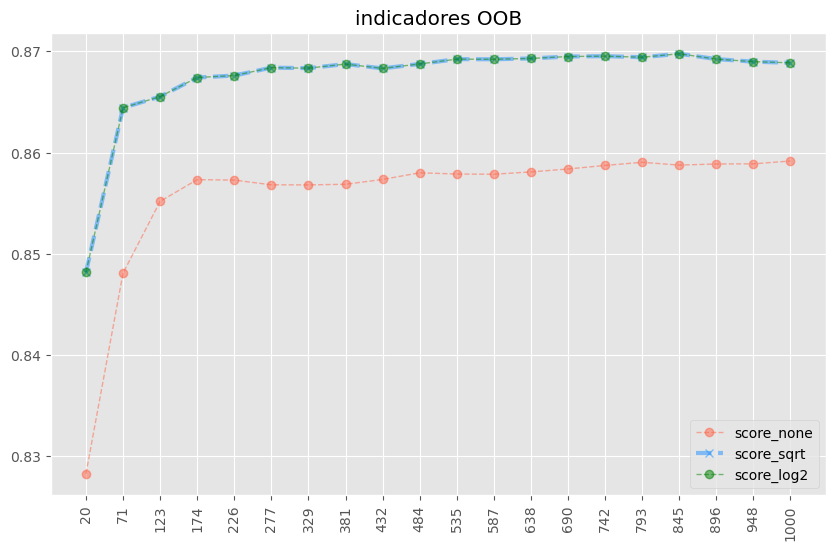

In [52]:
plt.plot(oob_none, 'o--', lw=1,alpha=.5,color='tomato', label=r'score_none')
plt.plot(oob_sqrt, 'x--', lw=3,alpha=.5,color='dodgerblue', label=r'score_sqrt')
plt.plot(oob_log2, 'o--', lw=1,alpha=.5,color='green', label=r'score_log2')
plt.xticks(range(len(n_estimators)),n_estimators, rotation=90)
plt.title('indicadores OOB')
plt.legend()

In [49]:
mejor_n = n_estimators[oob_sqrt.index(np.max(oob_sqrt))]
mejor_n

845

* Esto nos indica que con n_estimators = 845 minimizamos el error con respecto a un test en out of bag, es decir se obtiene mayor puntaje score oob con los parametros:
    - n_estimators = 845
    - feature = sqrt o log2


### Ejercicio 5: Refactoriza el modelo

La prueba en grilla nos arroja el mejor modelo que coincide con el mejor OOB

In [50]:
best_rf_sqrt = RandomForestRegressor(n_estimators=mejor_n,max_features='sqrt',
                                oob_score=True, random_state=1991,
                                n_jobs=-1)
best_rf_sqrt.fit(X_train_dl, y_train_dl)


best_rf_log2 = RandomForestRegressor(n_estimators=mejor_n,max_features='log2',
                                oob_score=True, random_state=1991,
                                n_jobs=-1)
best_rf_log2.fit(X_train_dl, y_train_dl)


RandomForestRegressor(max_features='log2', n_estimators=845, n_jobs=-1,
                      oob_score=True, random_state=1991)

In [51]:
metricas(X_test_dl, y_test_dl, best_rf_sqrt)
metricas(X_test_dl, y_test_dl, best_rf_log2)

Test MSE: 869697950.46058
Test MAE: 12258.89527
Test R2: 0.86962
Test MSE: 869697950.46058
Test MAE: 12258.89527
Test R2: 0.86962


* Vemos como ambos modelos son similares.
* Random forest sin hiperparametros:
    - Test MSE: 1361271243.48501
    - Test MAE: 15000.0
    - Test R2: 0.79593

* El MSE disminuye y el R2 aumenta, lo que nos indica estar frente a un mejor modelo.